In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv


# 🧼 Advanced Titanic Data Cleaning & Preprocessing

In this notebook, we'll go beyond basic cleaning and explore:
- Handling missing values
- Dropping and encoding columns
- Feature engineering
- Outlier detection
- Normalization and correlation analysis

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📌 Step 1: Check for Missing Values

We begin by examining the dataset to identify columns with missing data and decide how to handle them.

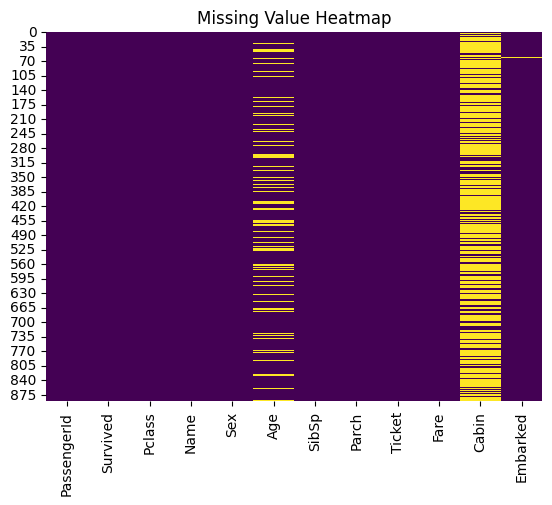

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Summary
df.isnull().sum()

In [4]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipykernel_35/4051350456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_35/4051350456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## 🧹 Step 2: Drop Duplicates & Irrelevant Columns

Some columns like 'Name' or 'Ticket' add little value for prediction and have high cardinality. We’ll also remove duplicates.


In [5]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Drop unnecessary columns
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [6]:
# Standardize text data
df['Sex'] = df['Sex'].str.lower().str.strip()
df['Embarked'] = df['Embarked'].str.upper().str.strip()

## 🔢 Step 3: Convert Text Columns to Numerical

To feed data into machine learning models, we convert categorical variables like 'Sex' and 'Embarked' using label encoding.


In [7]:
# Convert 'Sex' and 'Embarked' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

## 🏗️ Step 4: Feature Engineering

We create two new features:
- FamilySize = SibSp + Parch + 1
- IsAlone = 1 if FamilySize == 1 else 0


In [8]:
# Create FamilySize and IsAlone features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

## 🚨 Step 5: Outlier Detection

Let’s plot boxplots to spot outliers in numerical columns like 'Fare' and 'Age'.


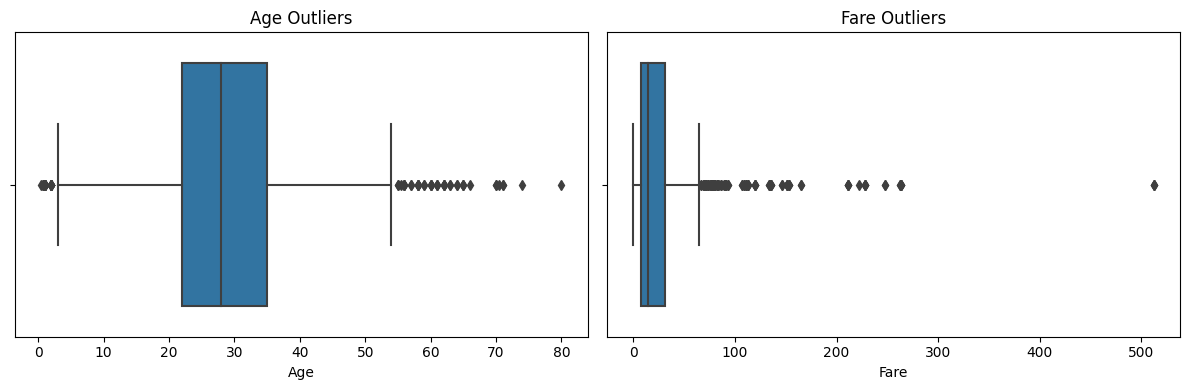

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Age"])
plt.title("Age Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Fare"])
plt.title("Fare Outliers")

plt.tight_layout()
plt.show()

## 🔗 Step 6: Feature Correlation

We’ll check how strongly each feature correlates with the target variable 'Survived'.


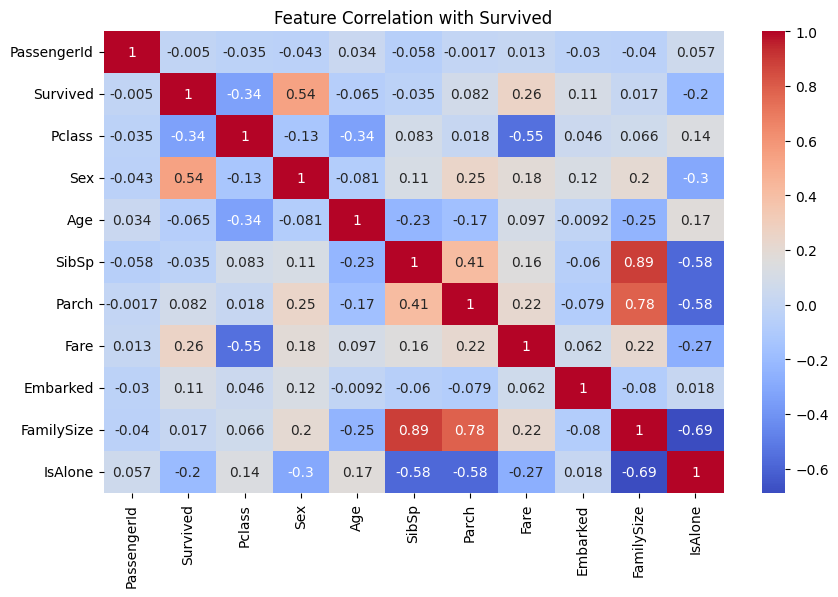

In [10]:
plt.figure(figsize=(10, 6))

# Use only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Survived")
plt.show()